/var/folders/41/93fvfx5910ldvs4p20rv5w540000gn/T/ipykernel_30754/2648072161.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-package

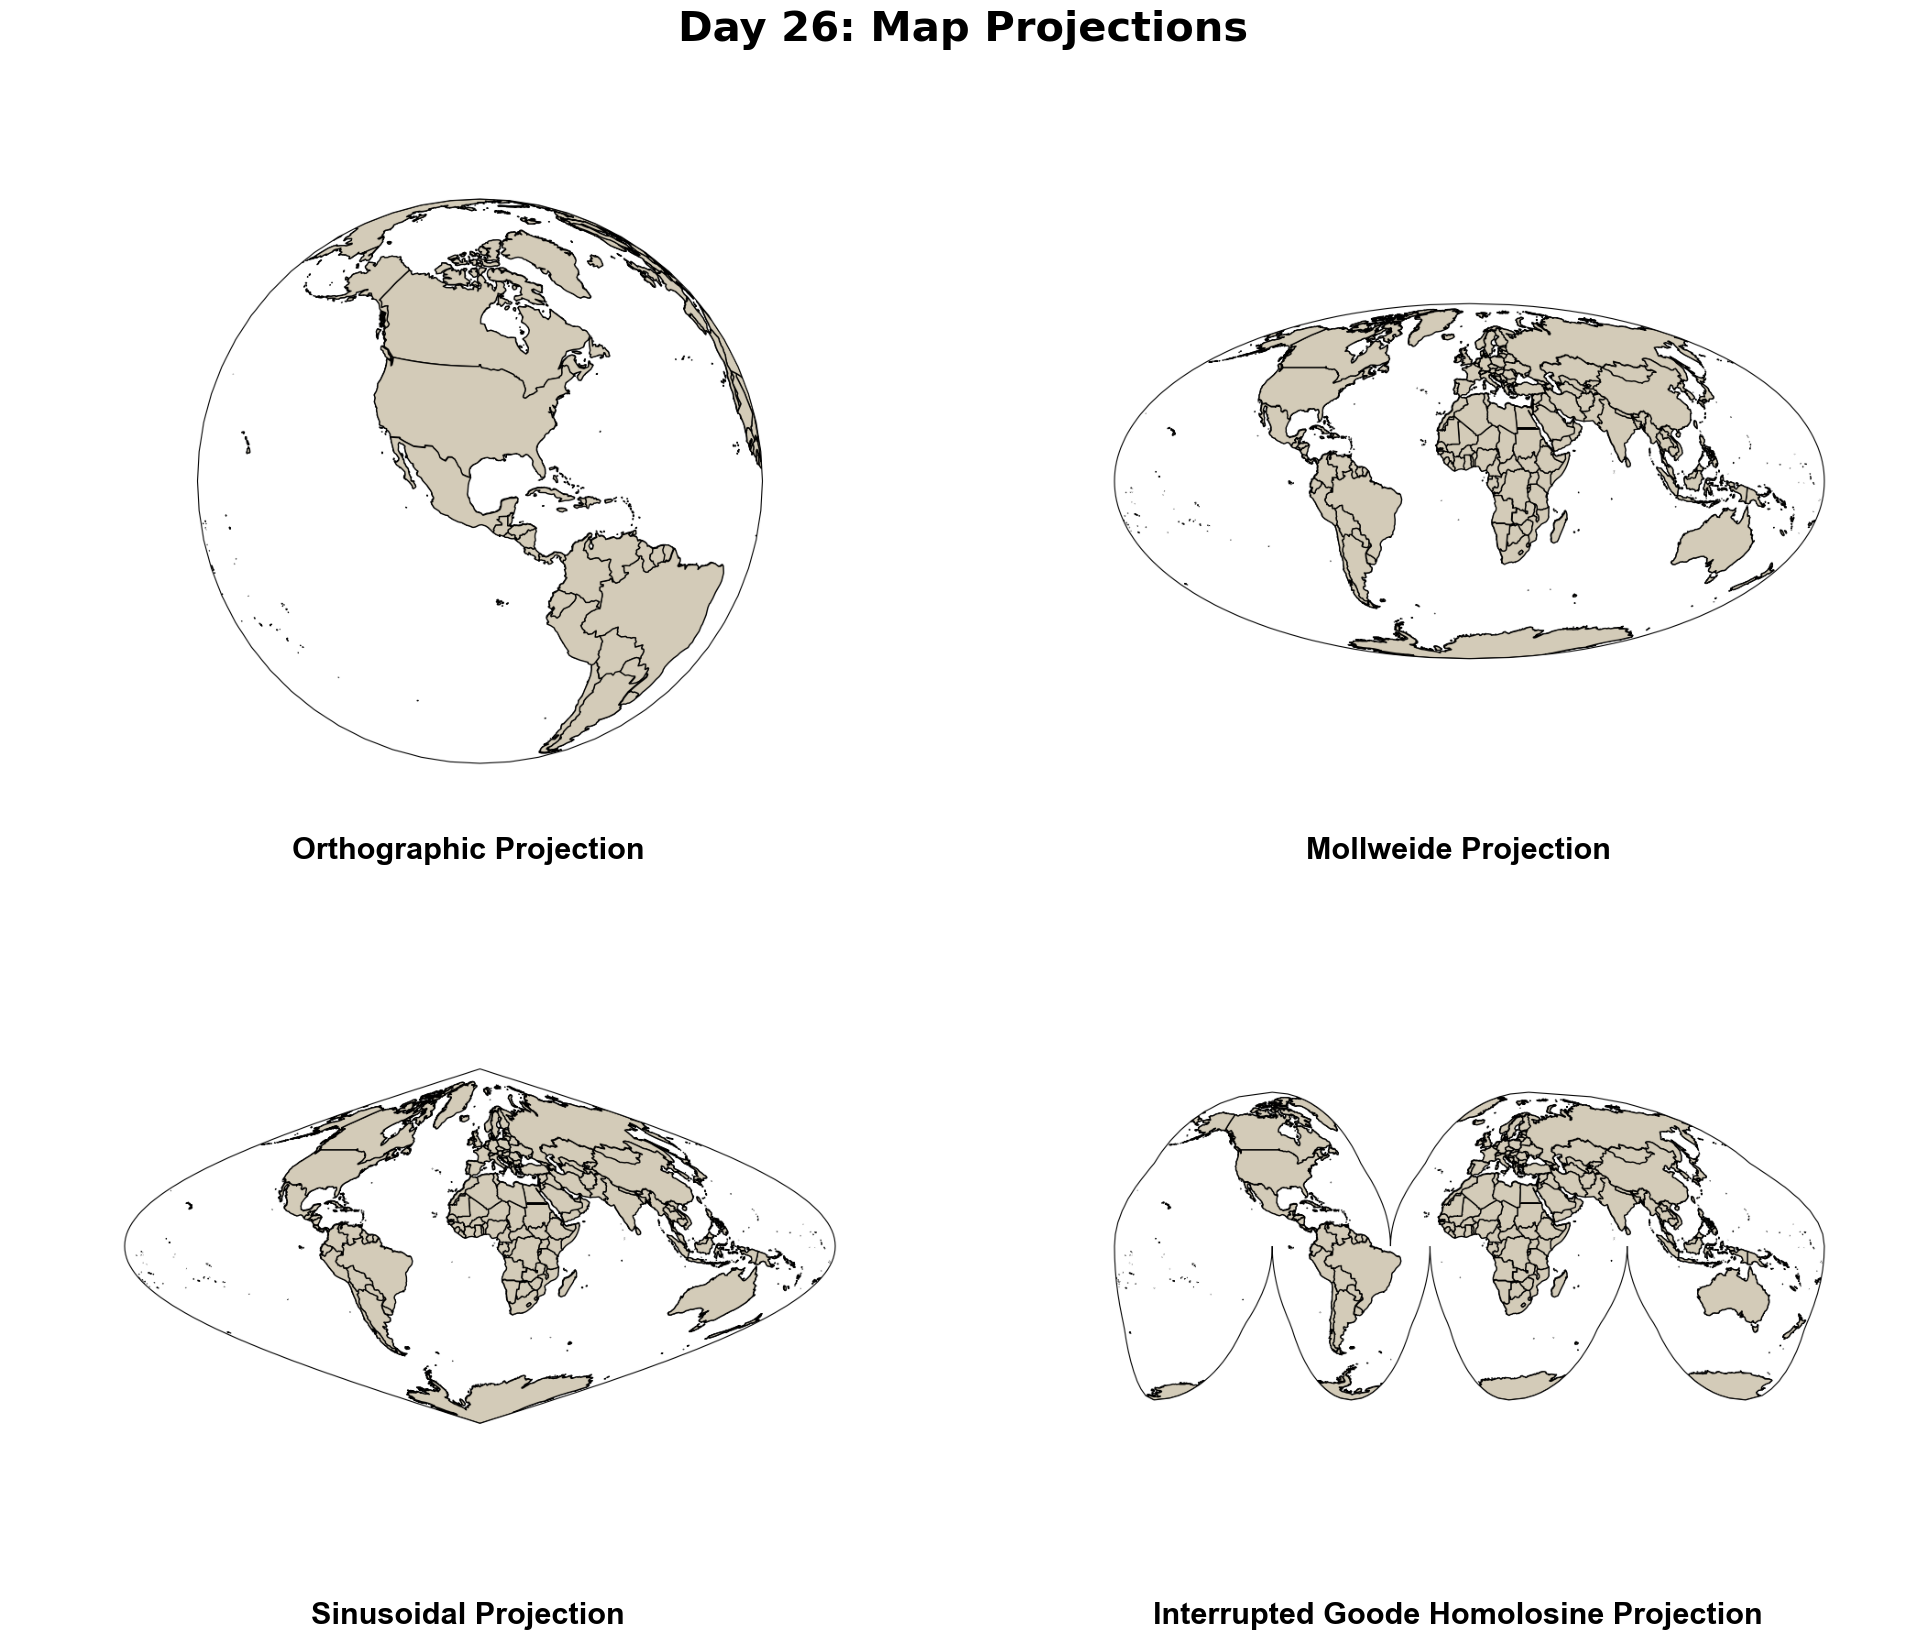

In [14]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import cartopy.feature as cf

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

orthographic_proj = ccrs.Orthographic(central_longitude=265, central_latitude=25)
fig_orthographic, ax_orthographic = plt.subplots(figsize=(10, 8), subplot_kw={'projection': orthographic_proj})
ax_orthographic.set_global()
ax_orthographic.coastlines(resolution='50m')
ax_orthographic.add_feature(cf.BORDERS, edgecolor='black')
for geometry in world.geometry:
    ax_orthographic.add_geometries(
        [geometry],
        crs=ccrs.PlateCarree(),
        facecolor="#D3CBB8",
        edgecolor="black"
    )


buf_orthographic = io.BytesIO()
fig_orthographic.savefig(buf_orthographic, format='png')
plt.close(fig_orthographic)

proj = ccrs.Mollweide(central_longitude=0)
fig_mollweide, ax_mollweide = plt.subplots(figsize=(10, 8), subplot_kw={'projection': proj})
ax_mollweide.set_global()
ax_mollweide.coastlines(resolution="50m")
ax_mollweide.add_feature(cf.BORDERS, linestyle=":", edgecolor="black")
for geometry in world.geometry:
    ax_mollweide.add_geometries(
        [geometry],
        crs=ccrs.PlateCarree(),
        facecolor="#D3CBB8",
        edgecolor="black"
    )


buf_mollweide = io.BytesIO()
fig_mollweide.savefig(buf_mollweide, format='png')
plt.close(fig_mollweide)

proj = ccrs.Sinusoidal(central_longitude=0)
fig_sinusoidal, ax_sinusoidal = plt.subplots(figsize=(10, 8), subplot_kw={'projection': proj})
ax_sinusoidal.set_global()
ax_sinusoidal.coastlines(resolution="50m")
ax_sinusoidal.add_feature(cf.BORDERS, linestyle=":", edgecolor="black")
for geometry in world.geometry:
    ax_sinusoidal.add_geometries(
        [geometry],
        crs=ccrs.PlateCarree(),
        facecolor="#D3CBB8",
        edgecolor="black"
    )


buf_sinusoidal = io.BytesIO()
fig_sinusoidal.savefig(buf_sinusoidal, format='png')
plt.close(fig_sinusoidal)

proj = ccrs.InterruptedGoodeHomolosine(central_longitude=0)
fig_goode, ax_goode = plt.subplots(figsize=(10, 8), subplot_kw={'projection': proj})
ax_goode.set_global()
ax_goode.coastlines(resolution="50m")
ax_goode.add_feature(cf.BORDERS, linestyle=":", edgecolor="black")
for geometry in world.geometry:
    ax_goode.add_geometries(
        [geometry],
        crs=ccrs.PlateCarree(),
        facecolor="#D3CBB8",
        edgecolor="black"
    )


buf_goode = io.BytesIO()
fig_goode.savefig(buf_goode, format='png')
plt.close(fig_goode)


orthographic_img = Image.open(buf_orthographic)
mollweide_img = Image.open(buf_mollweide)
sinusoidal_img = Image.open(buf_sinusoidal)
goode_img = Image.open(buf_goode)


fig, axs = plt.subplots(2, 2, figsize=(20, 16))


images = [orthographic_img, mollweide_img, sinusoidal_img, goode_img]
titles = [
    "Orthographic Projection",
    "Mollweide Projection",
    "Sinusoidal Projection",
    "Interrupted Goode Homolosine Projection"
]
for ax, img, title in zip(axs.flat, images, titles):
    ax.imshow(img)
    ax.axis('off')
    

    ax.text(
        0.5, -0.02,
        title,
        fontsize=22,
        weight="bold",
        ha="center",
        fontname="Arial",
        transform=ax.transAxes
    )


fig.suptitle(
    "Day 26: Map Projections", 
    fontsize=30,
    weight="bold",
    va="top",
    y=1.02
)

plt.tight_layout()
plt.show()